In [1]:
import tensorflow as tf
import numpy as np

# The IMDB Review Dataset

In [2]:
from tensorflow.keras.datasets import imdb

In [3]:
(x_train,y_train),(x_test,y_test)=imdb.load_data(num_words=10000)

In [4]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(25000,)
(25000,)
(25000,)
(25000,)


In [5]:
print(x_train[0])
print(y_train[:10])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
[1 0 0 1 0 0 1 0 1 0]


In [32]:
class_names=['Negative','Positive']


In [7]:
word_index=imdb.get_word_index()

In [8]:
list(word_index.items())[100:120]

[('dnd', 40844),
 ('dna', 11586),
 ('insecurity', 20598),
 ("'reboot'", 52047),
 ('trelkovsky', 11037),
 ('jaekel', 52048),
 ('sidebars', 52049),
 ("sforza's", 52050),
 ('distortions', 17633),
 ('mutinies', 52051),
 ('sermons', 30602),
 ('7ft', 40846),
 ('boobage', 52052),
 ("o'bannon's", 52053),
 ('populations', 23380),
 ('chulak', 52054),
 ('mesmerize', 27633),
 ('quinnell', 52055),
 ('yahoo', 10307),
 ('meteorologist', 52057)]

# Decoding the Reviews

In [9]:
reverse_word_index=dict((value,key) for key , value in word_index.items())
list(reverse_word_index.items())[100:120]

[(40844, 'dnd'),
 (11586, 'dna'),
 (20598, 'insecurity'),
 (52047, "'reboot'"),
 (11037, 'trelkovsky'),
 (52048, 'jaekel'),
 (52049, 'sidebars'),
 (52050, "sforza's"),
 (17633, 'distortions'),
 (52051, 'mutinies'),
 (30602, 'sermons'),
 (40846, '7ft'),
 (52052, 'boobage'),
 (52053, "o'bannon's"),
 (23380, 'populations'),
 (52054, 'chulak'),
 (27633, 'mesmerize'),
 (52055, 'quinnell'),
 (10307, 'yahoo'),
 (52057, 'meteorologist')]

In [10]:
def decode(review):
    array=[]
    for i in review:
        array.append(reverse_word_index[i])
    text=" ".join(array)
    print(text)

In [11]:
decode(x_train[0])
print("\nLength of text is: {} ".format(len(x_train[0])))

the as you with out themselves powerful lets loves their becomes reaching had journalist of lot from anyone to have after out atmosphere never more room and it so heart shows to years of every never going and help moments or of every chest visual movie except her was several of enough more with is now current film as you of mine potentially unfortunately of you than him that with out themselves her get for was camp of you movie sometimes movie that with scary but and to story wonderful that in seeing in character to of 70s musicians with heart had shadows they of here that with her serious to have does when from why what have critics they is you that isn't one will very to as itself with other and in of seen over landed for anyone of and br show's to whether from than out themselves history he name half some br of and odd was two most of mean for 1 any an boat she he should is thought frog but of script you not while history he heart to real at barrel but when from one bit then have tw

# Padding the Data

In [12]:
a=[len(x) for x in x_train]
print("Length of first 10 Reviews" ,a[:10])
print("\nMaximum Length of a Review is {}".format(max(a)))
print("\nAverage Length of a Review is {}".format(np.mean(a)))

Length of first 10 Reviews [218, 189, 141, 550, 147, 43, 123, 562, 233, 130]

Maximum Length of a Review is 2494

Average Length of a Review is 238.71364


In [13]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [14]:
x_train=pad_sequences(x_train,maxlen=256,truncating='post',padding='post')
x_test=pad_sequences(x_test,maxlen=256,truncating='post',padding='post')

In [15]:
x_train[1]

array([   1,  194, 1153,  194, 8255,   78,  228,    5,    6, 1463, 4369,
       5012,  134,   26,    4,  715,    8,  118, 1634,   14,  394,   20,
         13,  119,  954,  189,  102,    5,  207,  110, 3103,   21,   14,
         69,  188,    8,   30,   23,    7,    4,  249,  126,   93,    4,
        114,    9, 2300, 1523,    5,  647,    4,  116,    9,   35, 8163,
          4,  229,    9,  340, 1322,    4,  118,    9,    4,  130, 4901,
         19,    4, 1002,    5,   89,   29,  952,   46,   37,    4,  455,
          9,   45,   43,   38, 1543, 1905,  398,    4, 1649,   26, 6853,
          5,  163,   11, 3215,    2,    4, 1153,    9,  194,  775,    7,
       8255,    2,  349, 2637,  148,  605,    2, 8003,   15,  123,  125,
         68,    2, 6853,   15,  349,  165, 4362,   98,    5,    4,  228,
          9,   43,    2, 1157,   15,  299,  120,    5,  120,  174,   11,
        220,  175,  136,   50,    9, 4373,  228, 8255,    5,    2,  656,
        245, 2350,    5,    4, 9837,  131,  152,  4

In [16]:
a=[len(x) for x in x_train[:10]]
print(a)

[256, 256, 256, 256, 256, 256, 256, 256, 256, 256]


# Word Embeddings and Model Training

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D, GRU, Dropout

In [18]:
model= Sequential([
    Embedding(10000,32,input_length=256),
    GRU(32,activation='relu'),
    Dense(32),
    Dropout(0.3),
    Dense(1,activation='sigmoid'),
])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 256, 32)           320000    
_________________________________________________________________
gru (GRU)                    (None, 32)                6336      
_________________________________________________________________
dense (Dense)                (None, 32)                1056      
_________________________________________________________________
dropout (Dropout)            (None, 32)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 327,425
Trainable params: 327,425
Non-trainable params: 0
_________________________________________________________________
None


In [19]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [20]:
history=model.fit(x_train,y_train,
          validation_split=0.2,
          batch_size=32,
          epochs=10)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 139s 7ms/sample - loss: 0.6927 - accuracy: 0.5092 - val_loss: 0.6922 - val_accuracy: 0.5142
Epoch 2/10
20000/20000 [==============================] - 139s 7ms/sample - loss: 0.6820 - accuracy: 0.5500 - val_loss: 0.6895 - val_accuracy: 0.5240
Epoch 3/10
20000/20000 [==============================] - 140s 7ms/sample - loss: 0.5032 - accuracy: 0.7566 - val_loss: 0.4086 - val_accuracy: 0.8174
Epoch 4/10
20000/20000 [==============================] - 140s 7ms/sample - loss: 0.3172 - accuracy: 0.8755 - val_loss: 0.3776 - val_accuracy: 0.8516
Epoch 5/10
20000/20000 [==============================] - 143s 7ms/sample - loss: 0.2407 - accuracy: 0.9121 - val_loss: 0.3707 - val_accuracy: 0.8606
Epoch 6/10
20000/20000 [==============================] - 148s 7ms/sample - loss: 0.1890 - accuracy: 0.9352 - val_loss: 0.4069 - val_accuracy: 0.8594
Epoch 7/10
20000/20000 [===========================

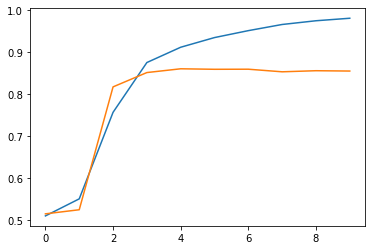

In [22]:
train_acc=history.history['accuracy']
val_acc=history.history['val_accuracy']
from matplotlib import pyplot as plt
plt.plot(range(10),train_acc)
plt.plot(range(10),val_acc)

In [23]:
a=model.evaluate(x_test,y_test)

25000/25000 [==============================] - 32s 1ms/sample - loss: 0.7939 - accuracy: 0.8347


In [25]:
print("Testing Accuracy is {}".format(a[1]))

Testing Accuracy is 0.8347200155258179


In [40]:
p=model.predict(x_test[:20])

In [41]:
p=[1 if x>0.5 else 0 for x in p]

In [47]:
print(list(y_test[:20]))
print(p)

[0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0]
[0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0]
